# Building RAG Chatbots for Technical Documentation - First Experimental Approach (**Part 2**)

In [22]:
import warnings
warnings.filterwarnings('ignore')

`(1) LangSmith`

https://docs.smith.langchain.com/ (To generate an API Key) <br><br>
Copy your token into the **HFHUB_API_KEY** parameter in the **Constants.py** file.

In [23]:
import os
import Constants
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = Constants.LANGCHAIN_API_KEY

`(2) HuggingFace API Key`

https://huggingface.co/settings/tokens

- Press **+ Create new Token**
<br><br>
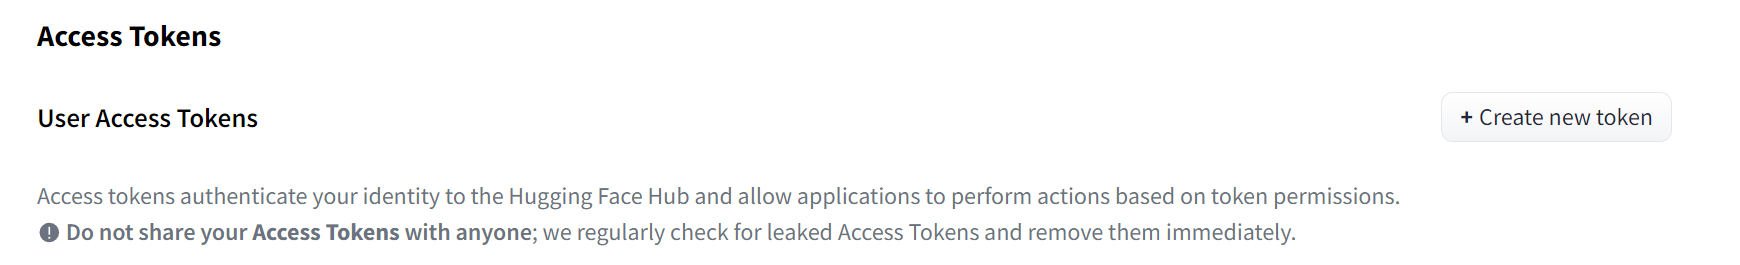
<br><br>
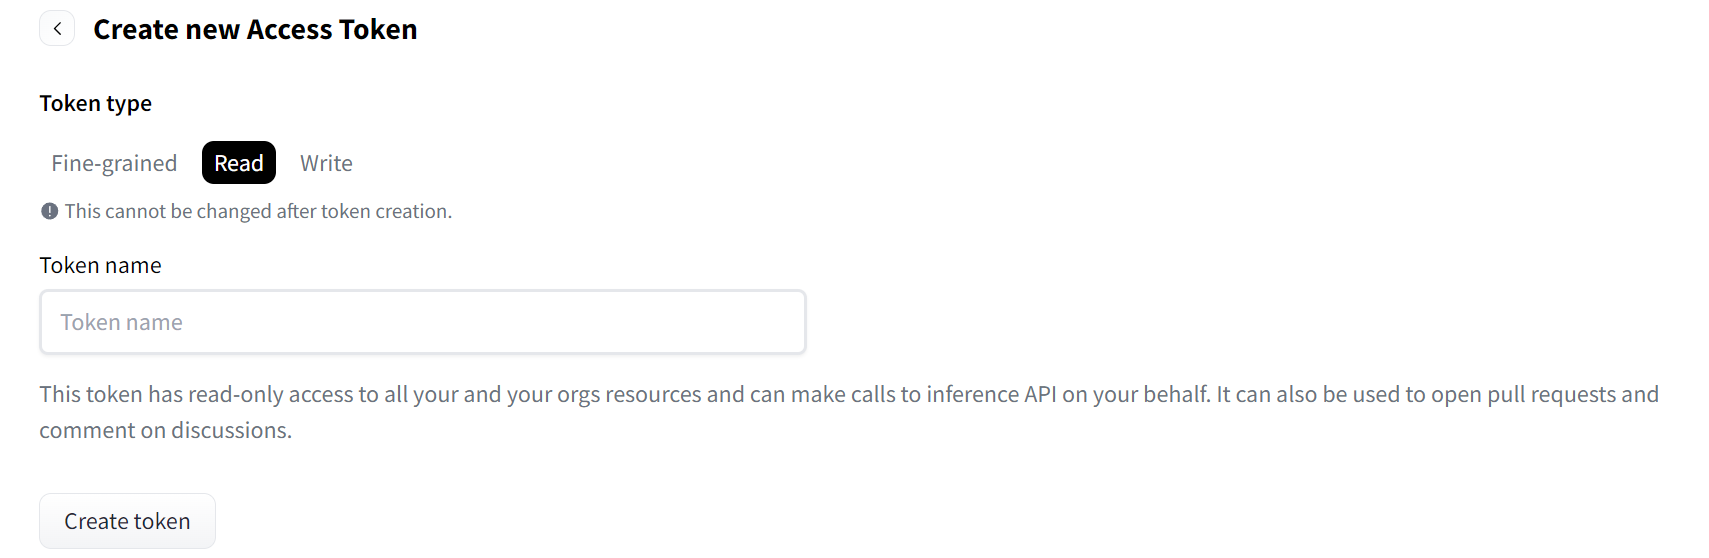
<br><br>
- Choose **Read** and a name and you token is created.<br><br>
- Copy your token into the **HFHUB_API_KEY** parameter in the **Constants.py** file.

In [24]:
HFHUB_API_KEY = Constants.HFHUB_API_KEY

In [25]:
from langchain import hub
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.llms import HuggingFaceHub
from langchain_chroma import Chroma
import textwrap


## Part 3 : Generate Retreiver

In [26]:
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={'tokenizer_kwargs': {'clean_up_tokenization_spaces': True}}
)
vectorstore = Chroma(persist_directory=Constants.PERSIST_DIRECTORY, embedding_function=embeddings)
retriever = vectorstore.as_retriever()


## Part 4 : Initialize the LLM and prompt template

To use the model, access the [repository](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3), login with your **HuggingFace account** and **agree to share your contact information to access this model** <br><br>
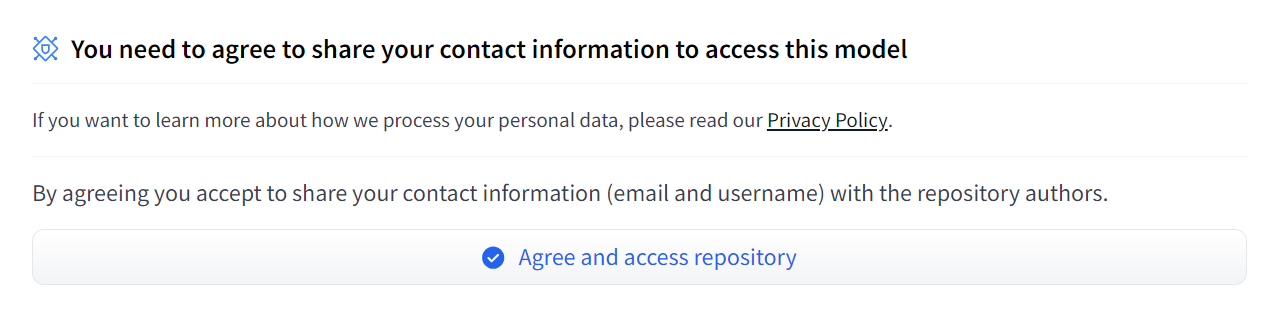

In [27]:
# Prompt
prompt = hub.pull("rlm/rag-prompt")

# LLM
# Corrected HuggingFaceEndpoint initialization
llm = HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.3", 
                     model_kwargs={"max_length": 512},
                     huggingfacehub_api_token=HFHUB_API_KEY)


## Part 5 : Define RAG Chain

In [28]:
# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

## Part 6 : Invoke RAG Chain

- Write the question you want to make

In [ ]:
# For example, question = "How often will the list of high-risk AI systems be reviewed and updated?"
question = "..."

In [35]:
result = rag_chain.invoke(question)

answer = result.split("Answer:")[-1].strip() if "Answer:" in result else result.strip()

print(textwrap.fill(answer,width=100))


The notified body shall carry out appropriate audits and assessments at least once every 12 months
to ensure the manufacturer applies the approved quality management system and post-market
surveillance plan. This includes audits on the manufacturer's premises, suppliers, and
subcontractors, if necessary. The results of these audits and any decisions taken shall be
thoroughly documented. However, the specific frequency for reviewing and updating the list of high-
risk AI systems is not explicitly stated in the


#### Next Notebook: [RAG-Fusion](3-RAG-Fusion.ipynb)